Mejor asignación para 2 procesadores:
[(62, 1, 1), (90, 1, 2), (64, 2, 2), (60, 1, 2), (83, 1, 1), (52, 2, 1), (92, 1, 1), (87, 2, 2), (98, 1, 2), (98, 2, 2), (58, 1, 2), (66, 2, 1), (78, 1, 2), (61, 1, 1), (99, 1, 1), (58, 1, 2), (77, 2, 2), (92, 2, 1), (75, 1, 2), (68, 1, 1), (77, 2, 1), (65, 2, 1), (79, 2, 2), (70, 1, 1), (87, 2, 1), (60, 2, 2), (53, 2, 1), (81, 1, 1), (75, 1, 2), (73, 2, 2), (92, 1, 2), (100, 1, 2), (68, 1, 1), (86, 1, 2), (60, 1, 2), (75, 2, 2), (50, 2, 2), (53, 1, 1), (96, 2, 1), (75, 1, 2), (61, 1, 1), (95, 2, 1), (65, 1, 1), (53, 1, 2), (67, 1, 1), (74, 1, 1), (79, 1, 2), (86, 1, 1), (27, 1, 1)]
Distribución de cargas correspondiente:
[1800, 1800]
Aptitud de la mejor asignación:
0.0

Mejor asignación para 3 procesadores:
[(99, 2, 1), (54, 1, 2), (53, 3, 1), (70, 1, 2), (58, 1, 1), (69, 3, 1), (58, 3, 1), (54, 1, 2), (89, 3, 1), (93, 2, 3), (88, 2, 3), (75, 2, 1), (73, 1, 1), (52, 1, 3), (82, 3, 3), (97, 2, 1), (80, 1, 2), (80, 3, 3), (89, 3, 1), (69, 3, 1), (97

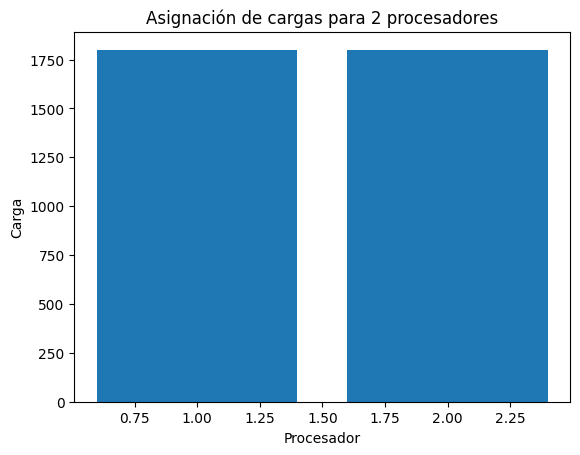

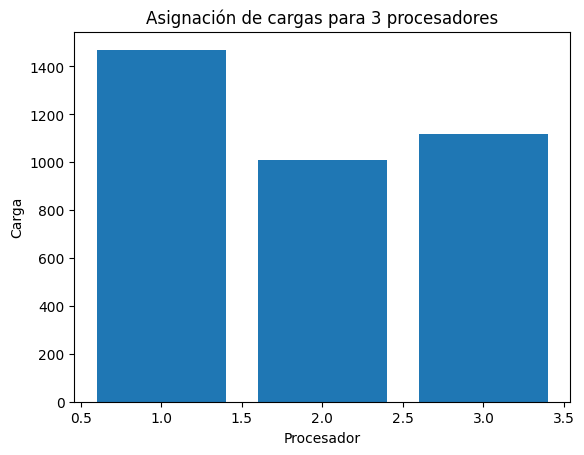

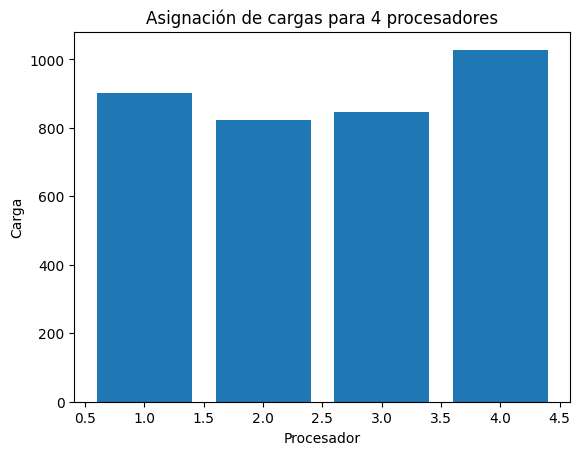

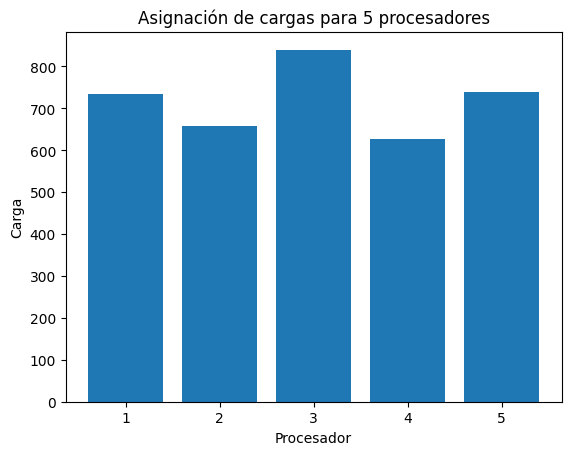

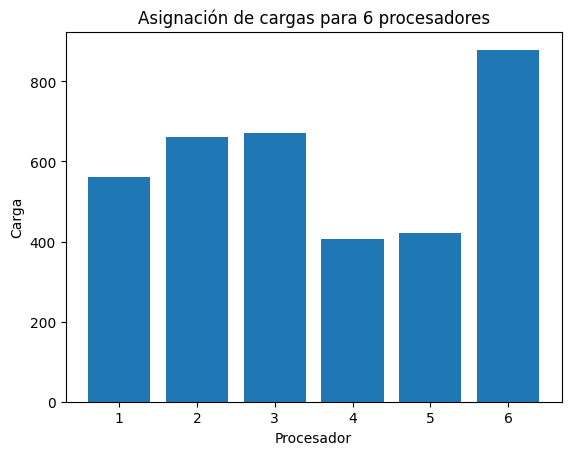

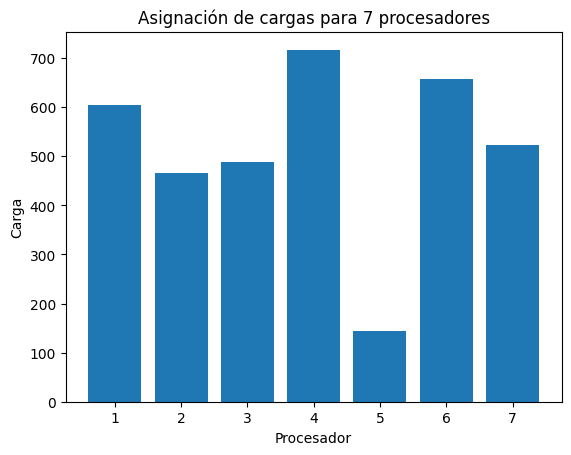

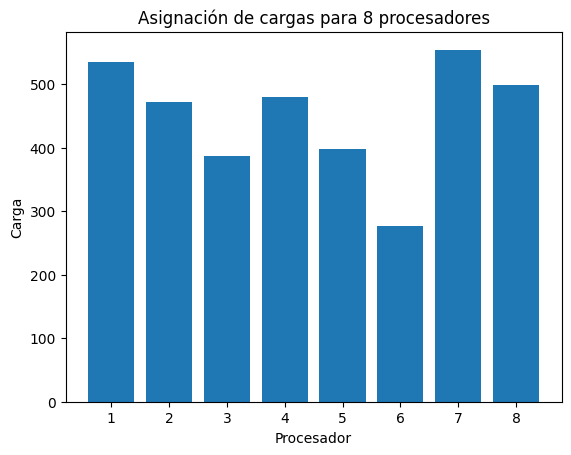

In [1]:
import random
import math
import statistics
import matplotlib.pyplot as plt

def generar_asignacion_aleatoria(cargas, numero_procesadores):
    asignacion = []
    for carga in cargas:
        ventana_actual = random.randint(1, numero_procesadores)
        procesador_asignado = random.randint(1, numero_procesadores)
        asignacion.append((carga, ventana_actual, procesador_asignado))
    return asignacion

def calcular_distribucion_de_cargas(asignacion, numero_procesadores):
    distribucion_cargas = [0] * numero_procesadores
    for carga, _, procesador in asignacion:
        distribucion_cargas[procesador - 1] += carga
    return distribucion_cargas

def calcular_aptitud(asignacion, numero_procesadores):
    distribucion_cargas = calcular_distribucion_de_cargas(asignacion, numero_procesadores)
    media = statistics.mean(distribucion_cargas)
    desviacion_estandar = statistics.stdev(distribucion_cargas)
    return desviacion_estandar

def mutar(asignacion, numero_procesadores):
    carga_aleatoria = random.randint(0, len(asignacion) - 1)
    carga_actual, ventana_actual, procesador_actual = asignacion[carga_aleatoria]
   
    carga_nueva = carga_actual
    ventana_nueva = random.randint(1, numero_procesadores)
    procesador_nuevo = random.randint(1, numero_procesadores)
  
    asignacion[carga_aleatoria] = (carga_nueva, ventana_nueva, procesador_nuevo)
    return asignacion

def seleccionar_padre(poblacion, fitnesses):
    total_fitness = sum(fitnesses)
    probabilidades = [fitness / total_fitness for fitness in fitnesses]
    return random.choices(poblacion, weights=probabilidades)[0]

def cruzar(padre1, padre2):
    punto_cruce = random.randint(1, len(padre1) - 1)
    hijo1 = padre1[:punto_cruce] + padre2[punto_cruce:]
    hijo2 = padre2[:punto_cruce] + padre1[punto_cruce:]
    return hijo1, hijo2

numeros_procesadores = [2, 3, 4, 5, 6, 7, 8]
mejor_asignacion_por_procesadores = []
mejor_distribucion_cargas_por_procesadores = []
mejor_aptitud_por_procesadores = []

for numero_procesadores in numeros_procesadores:
    cargas = []
    suma_cargas = 0
    while suma_cargas < 3600:
        carga = random.randint(50, 100)
        cargas.append(carga)
        suma_cargas += carga
    cargas[-1] -= suma_cargas - 3600

    mejor_asignacion = None
    mejor_aptitud = float('inf')

    poblacion = [generar_asignacion_aleatoria(cargas, numero_procesadores) for _ in range(10)]

    for _ in range(100):
        fitnesses = [calcular_aptitud(asignacion, numero_procesadores) for asignacion in poblacion]
        nuevos_hijos = []

        while len(nuevos_hijos) < 2:
            padre1 = seleccionar_padre(poblacion, fitnesses)
            padre2 = seleccionar_padre(poblacion, fitnesses)
            hijo1, hijo2 = cruzar(padre1, padre2)
            nuevos_hijos.append(hijo1)
            nuevos_hijos.append(hijo2)

        for i, hijo in enumerate(nuevos_hijos):
            if random.random() < 0.1:
                nuevos_hijos[i] = mutar(hijo, numero_procesadores)

        poblacion[random.randint(0, len(poblacion) - 1)] = nuevos_hijos[0]
        poblacion[random.randint(0, len(poblacion) - 1)] = nuevos_hijos[1]

        mejor_aptitud_actual = min(fitnesses)
        if mejor_aptitud_actual < mejor_aptitud:
            mejor_aptitud = mejor_aptitud_actual
            mejor_asignacion = poblacion[fitnesses.index(mejor_aptitud_actual)]

    mejor_distribucion_cargas = calcular_distribucion_de_cargas(mejor_asignacion, numero_procesadores)
    
    mejor_asignacion_por_procesadores.append(mejor_asignacion)
    mejor_distribucion_cargas_por_procesadores.append(mejor_distribucion_cargas)
    mejor_aptitud_por_procesadores.append(mejor_aptitud)

    print("Mejor asignación para", numero_procesadores, "procesadores:")
    print(mejor_asignacion)
    print("Distribución de cargas correspondiente:")
    print(mejor_distribucion_cargas)
    print("Aptitud de la mejor asignación:")
    print(mejor_aptitud)
    print()

for i, numero_procesadores in enumerate(numeros_procesadores):
    plt.figure(i)
    plt.bar(range(1, numero_procesadores+1), mejor_distribucion_cargas_por_procesadores[i])
    plt.xlabel("Procesador")
    plt.ylabel("Carga")
    plt.title("Asignación de cargas para {} procesadores".format(numero_procesadores))

plt.show()